<a href="https://colab.research.google.com/github/Preeti123-cmd/PREETI/blob/main/Red_Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
!pip install imblearn

In [ ]:
df = pd.read_csv("winequality-red.csv")

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

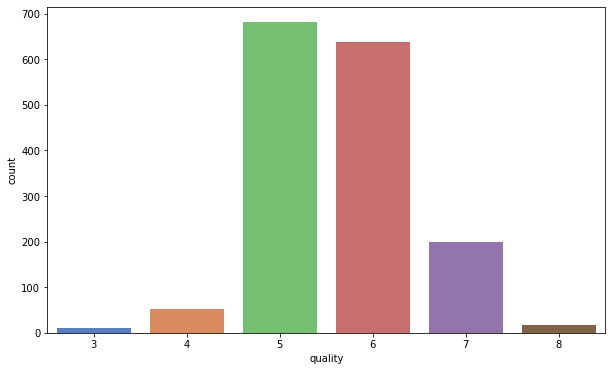

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"], palette="muted")
df["quality"].value_counts()

In [ ]:
print("Rows, columns: " + str(df.shape))
df.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


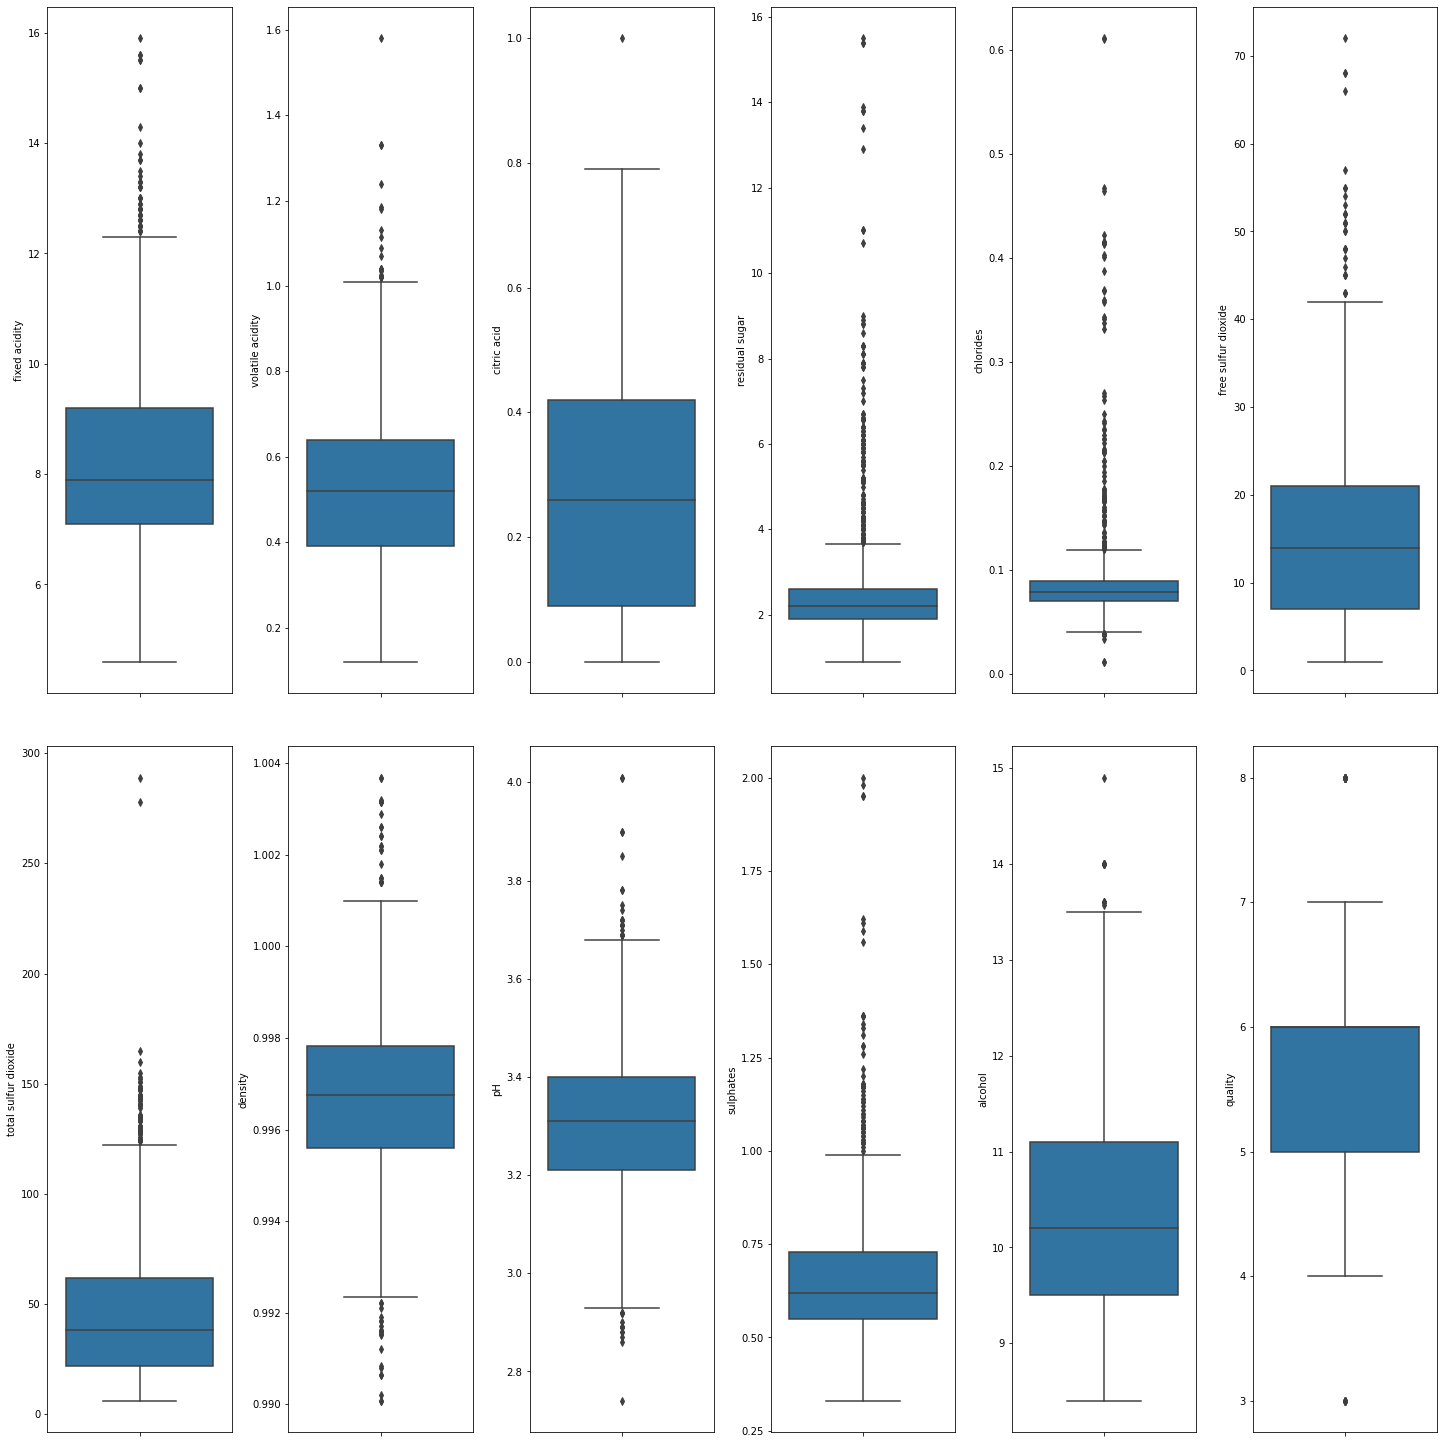

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,20))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

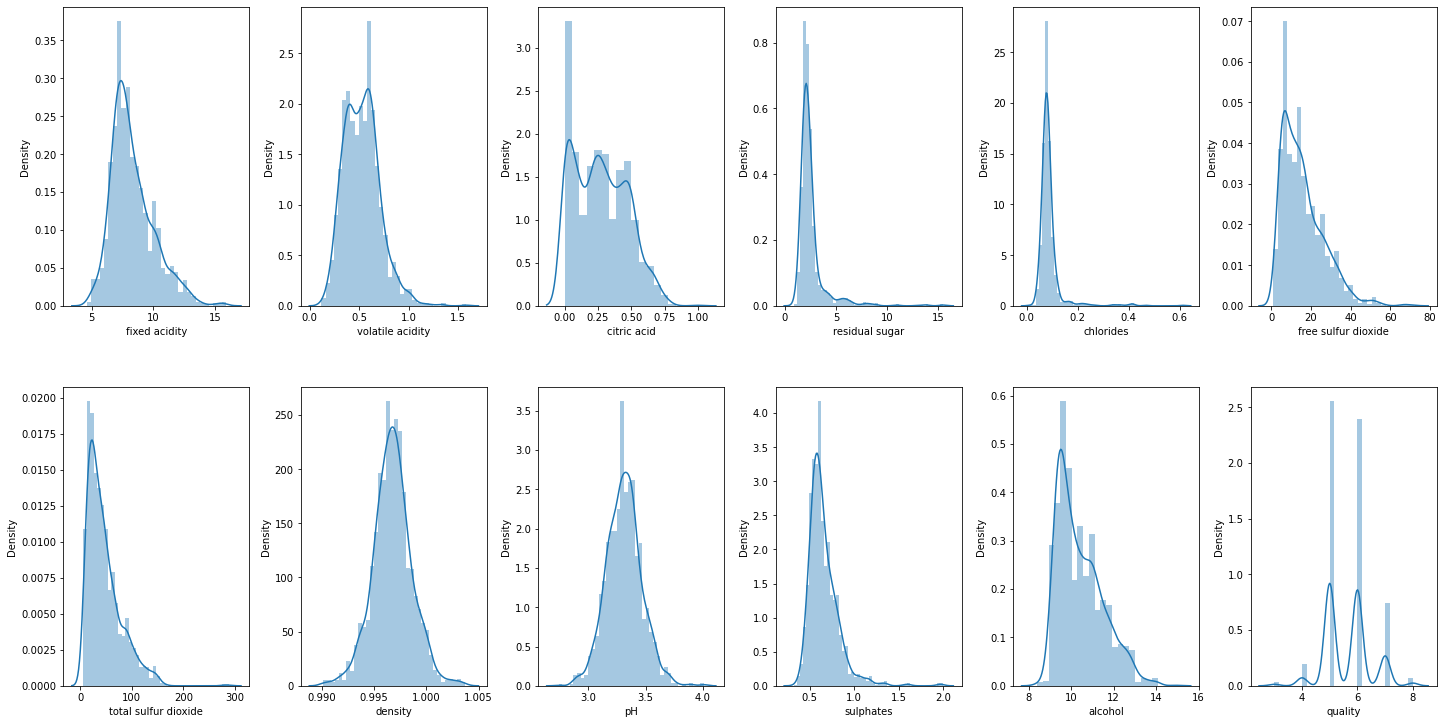

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

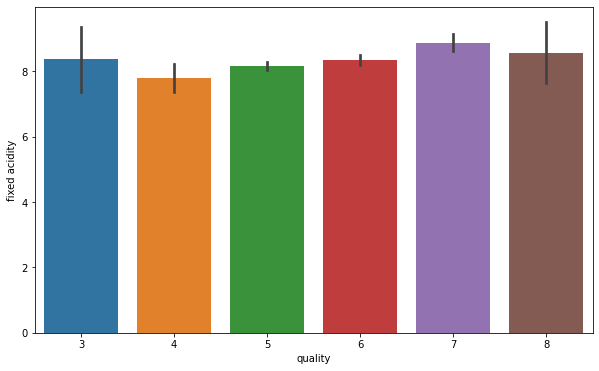

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

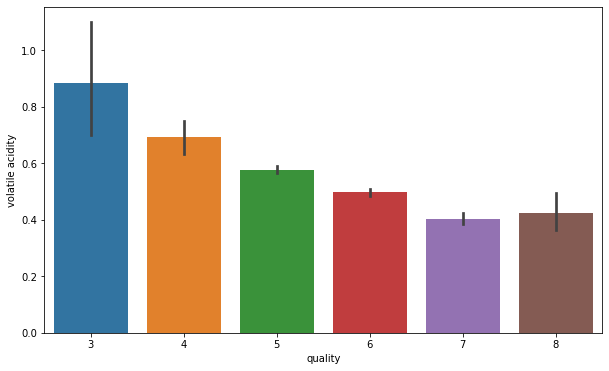

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

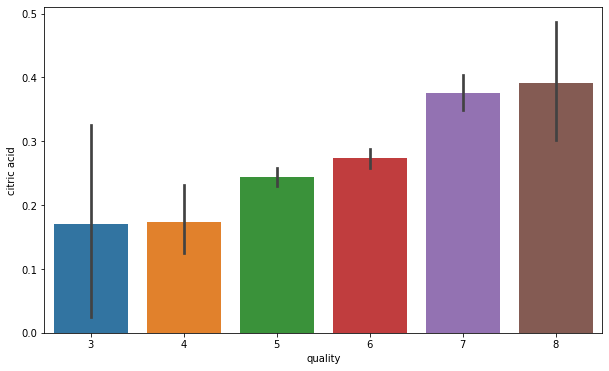

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

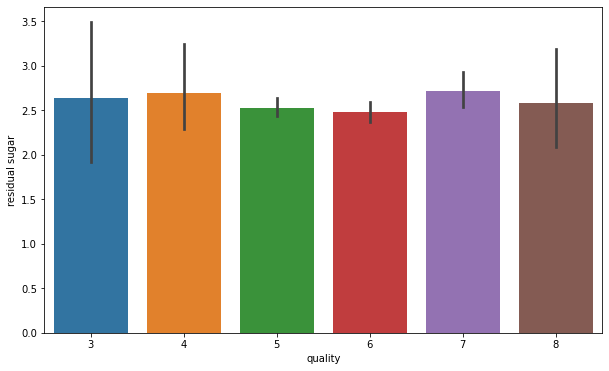

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

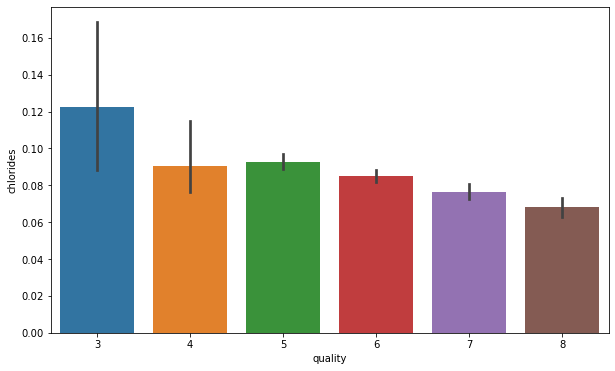

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

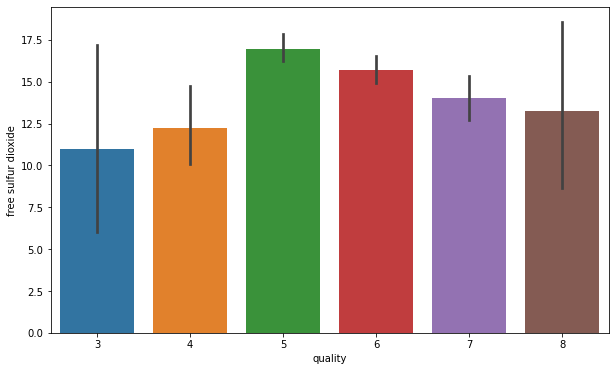

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

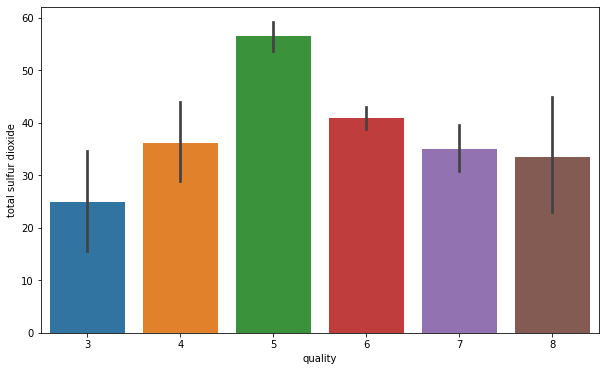

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

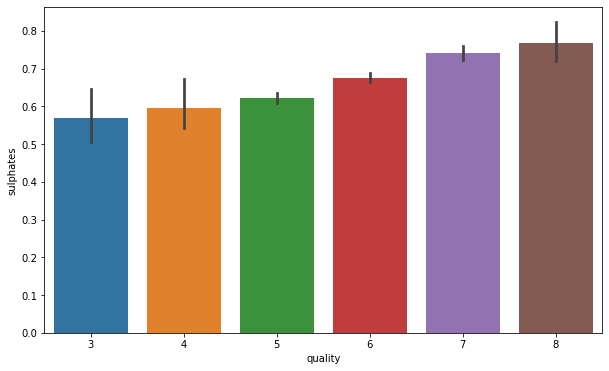

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

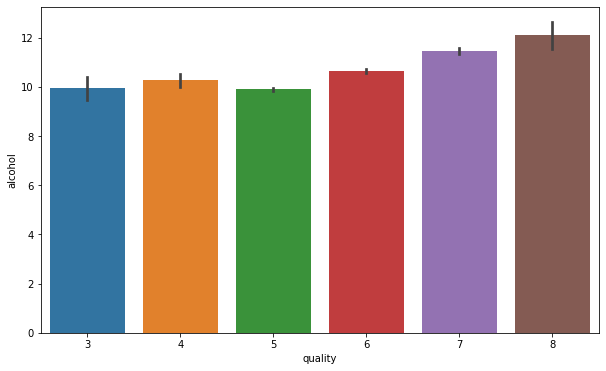

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])


In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

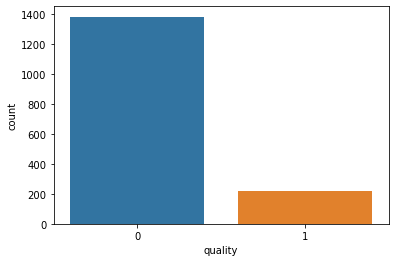

In [ ]:
sns.countplot(df['quality'])

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

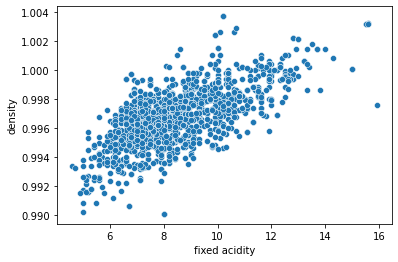

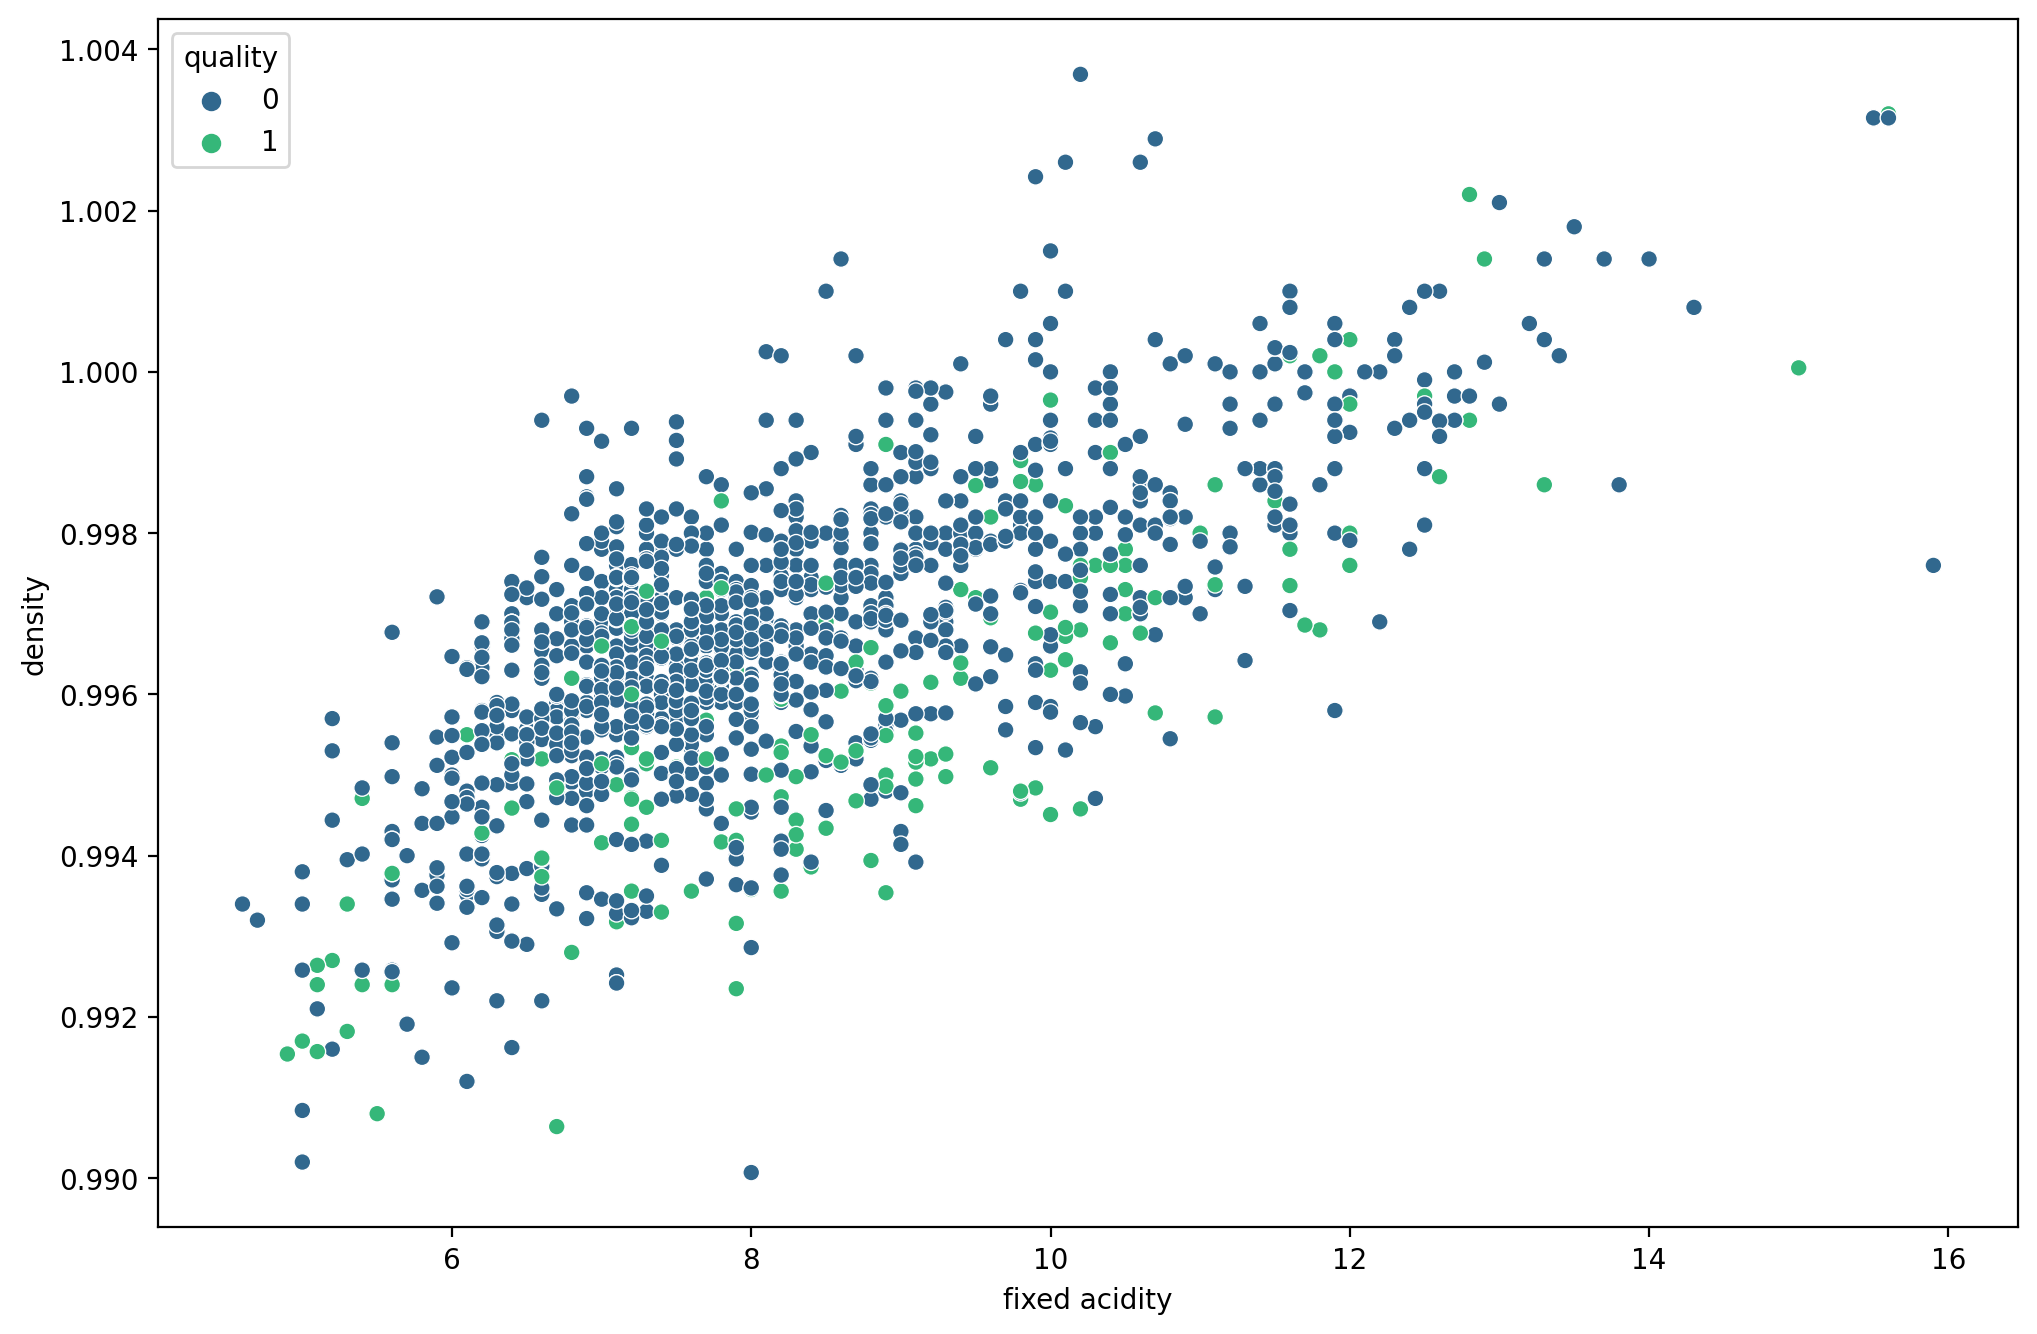

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='fixed acidity',y='density', data=df,hue='quality', palette='viridis')

Here we find positive correlation as the plot is linear

<AxesSubplot:xlabel='volatile acidity', ylabel='density'>

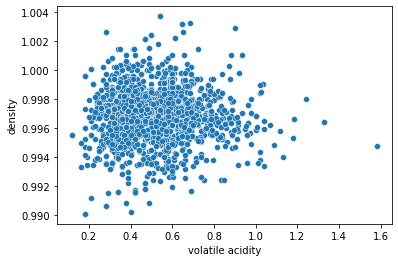

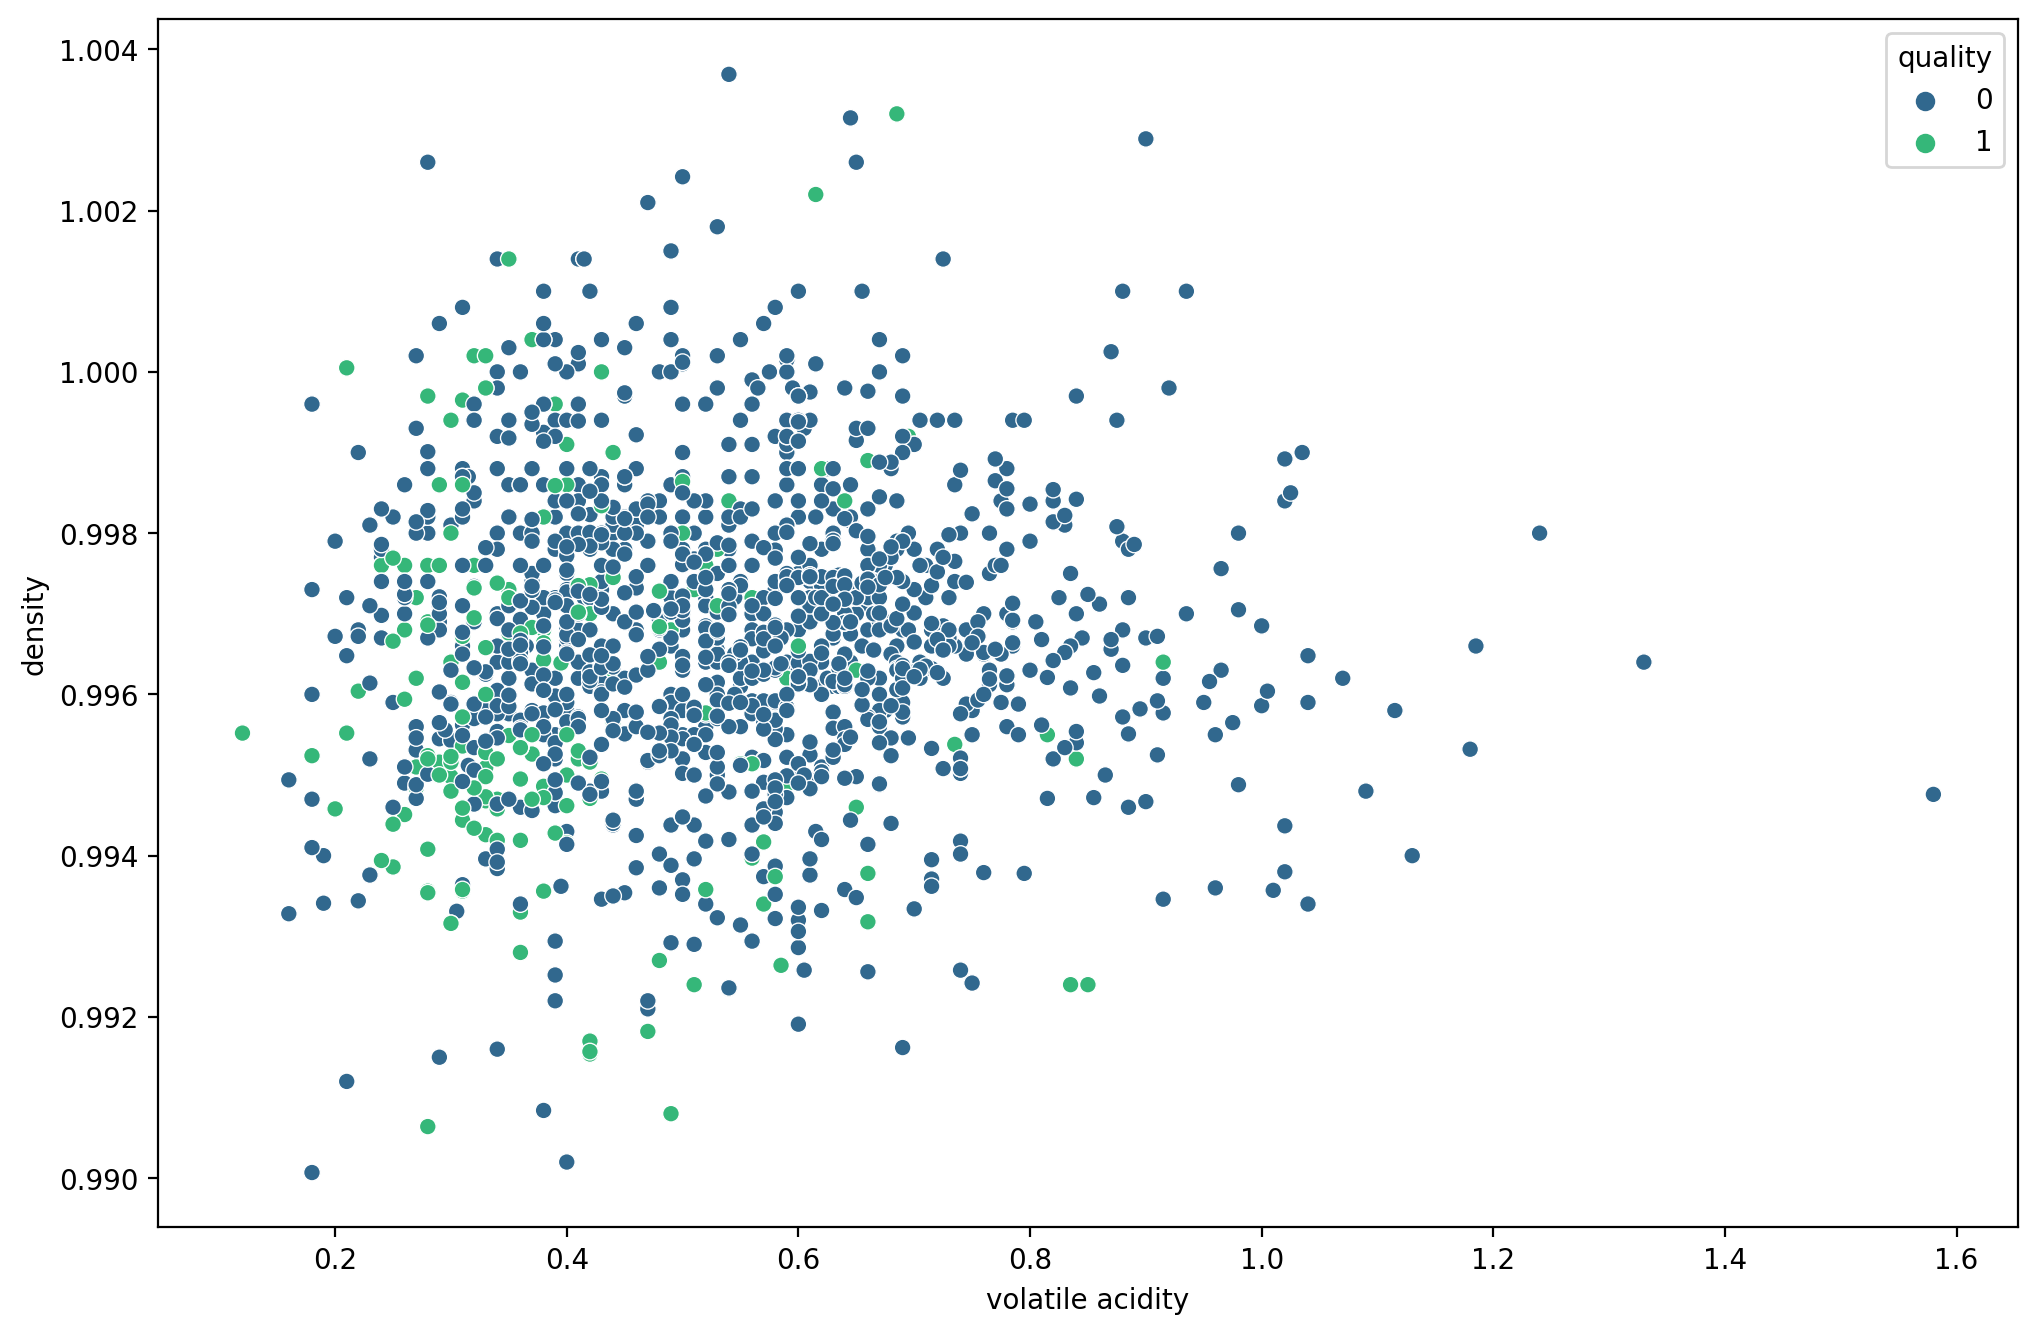

In [ ]:
sns.scatterplot(x='volatile acidity', y='density', data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='volatile acidity',y='density', data=df,hue='quality', palette='viridis')


Here we find medium to low correlation

<AxesSubplot:xlabel='citric acid', ylabel='density'>

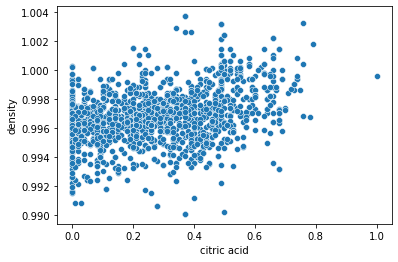

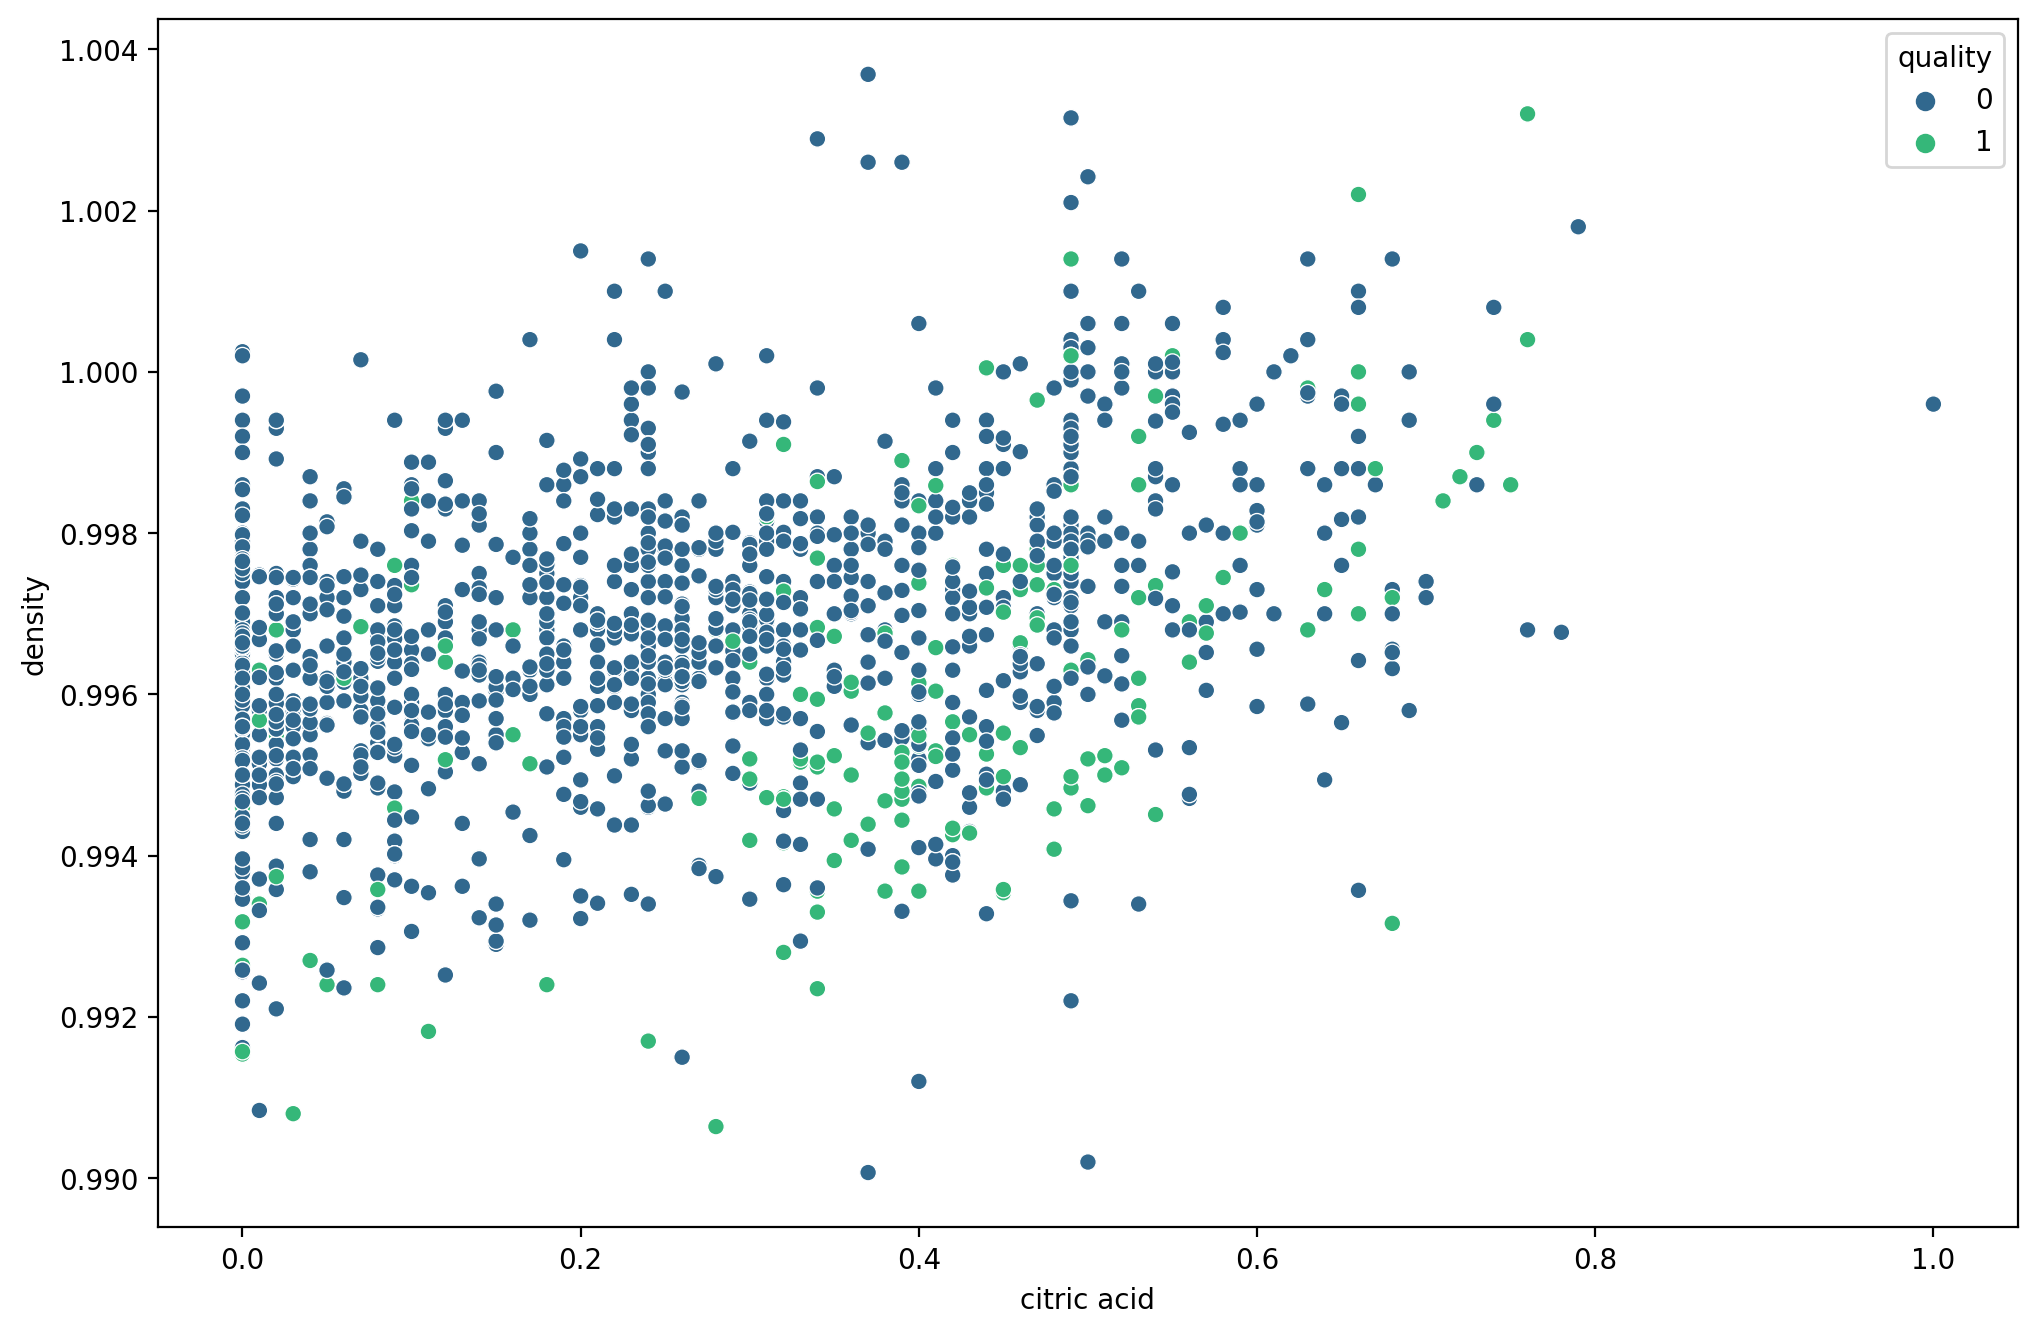

In [ ]:
sns.scatterplot(x='citric acid', y='density', data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='citric acid',y='density', data=df,hue='quality', palette='viridis')


Here we find medium to low correlation

<AxesSubplot:xlabel='alcohol', ylabel='density'>

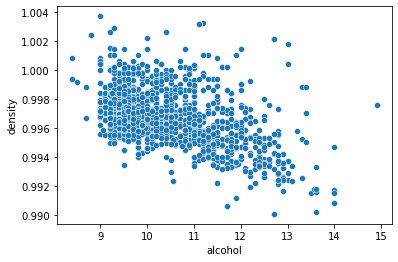

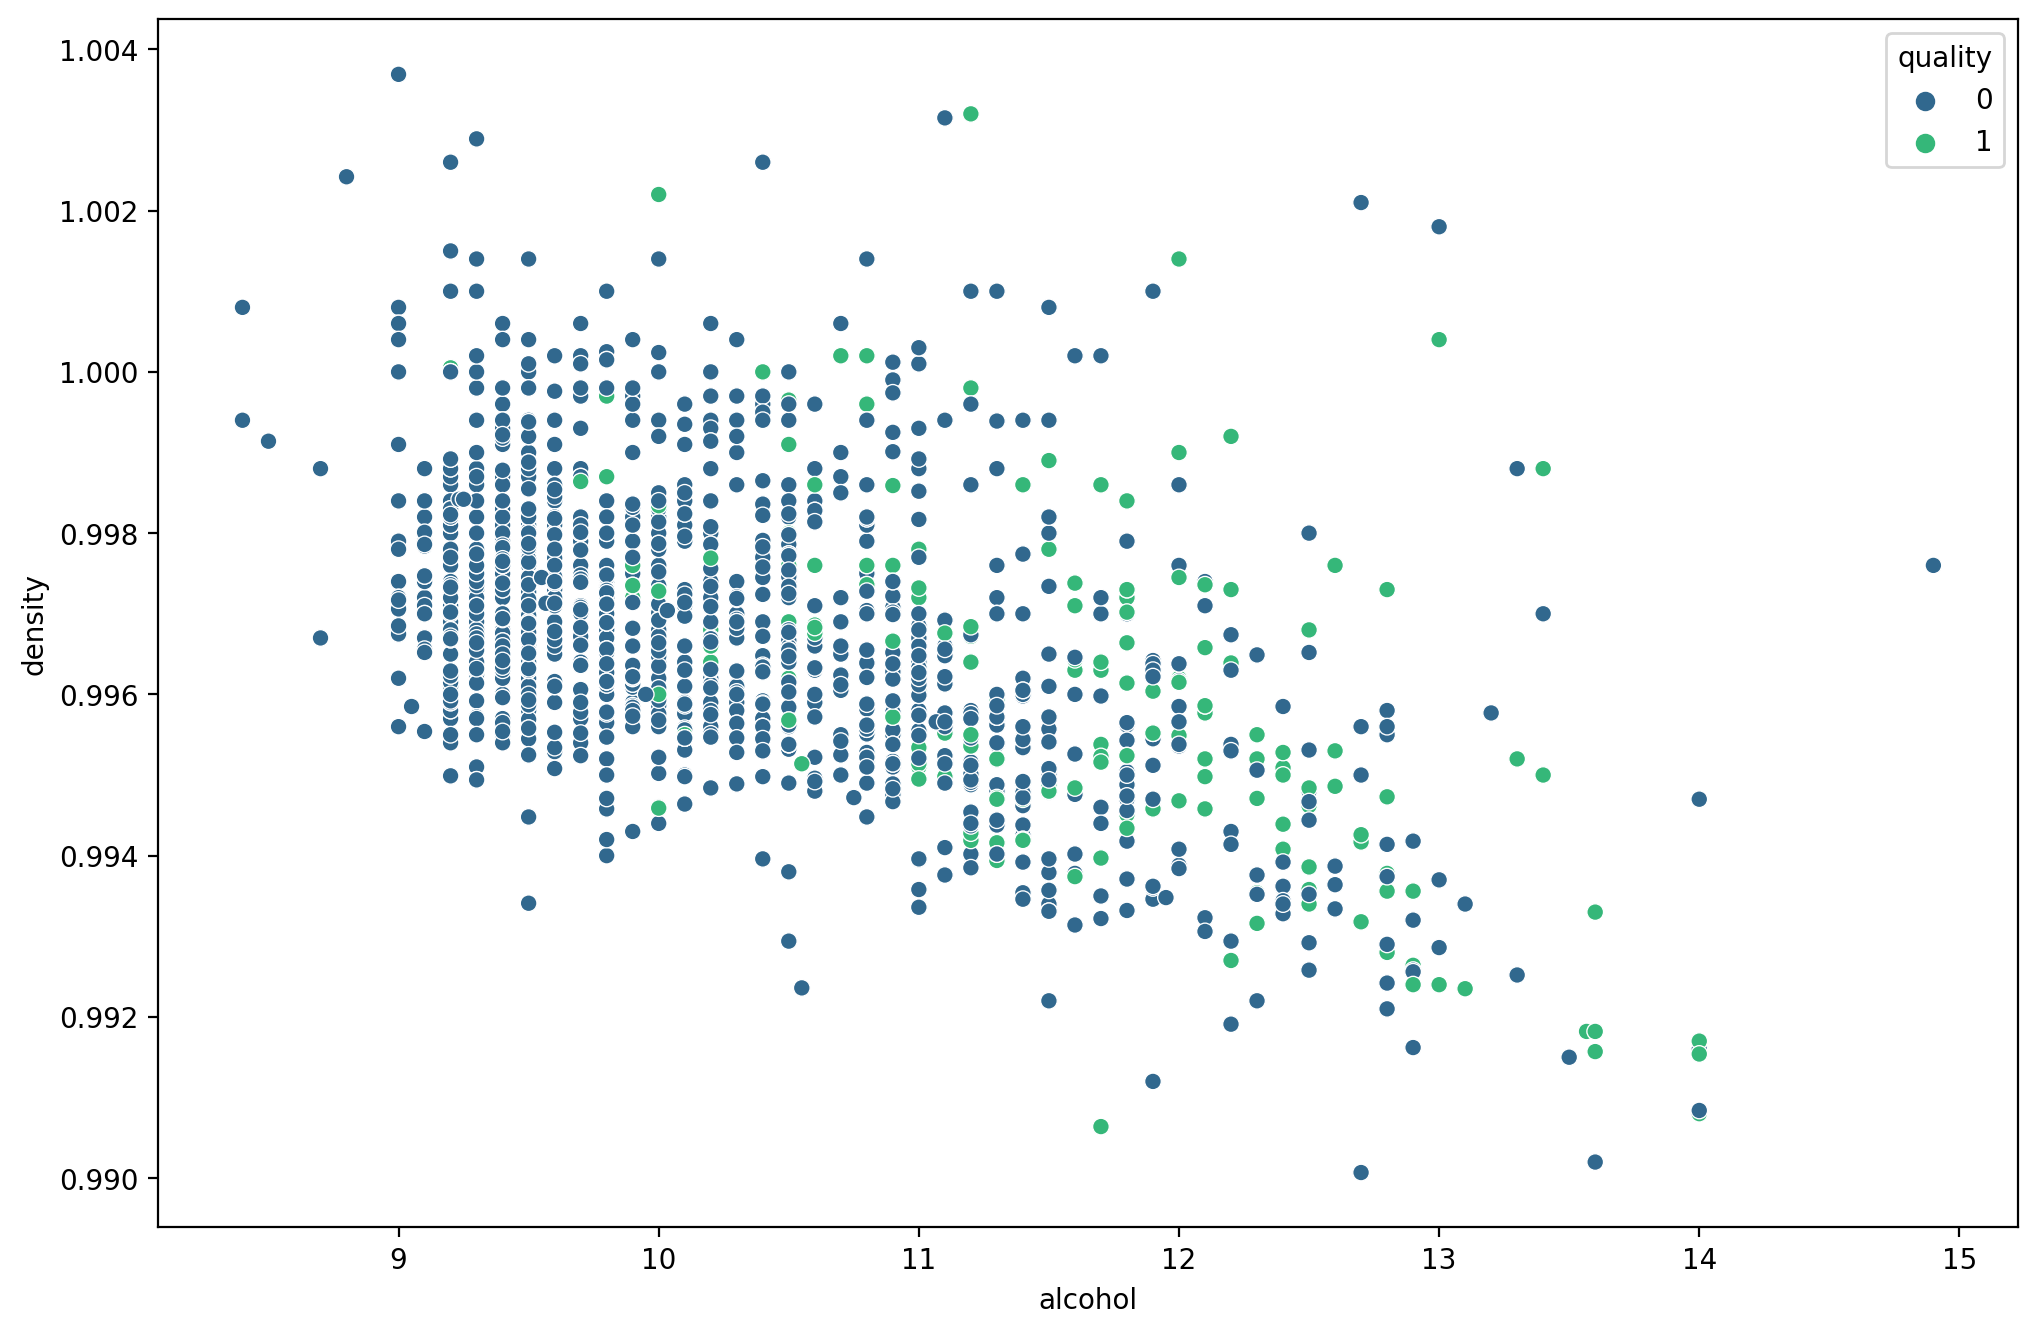

In [ ]:
sns.scatterplot(x='alcohol', y='density', data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='alcohol',y='density', data=df,hue='quality', palette='viridis')

Here we find high correlation

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

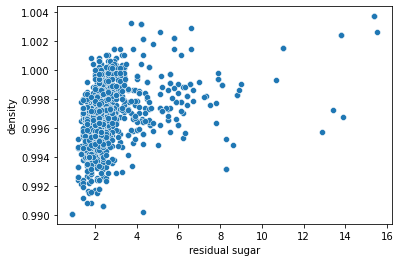

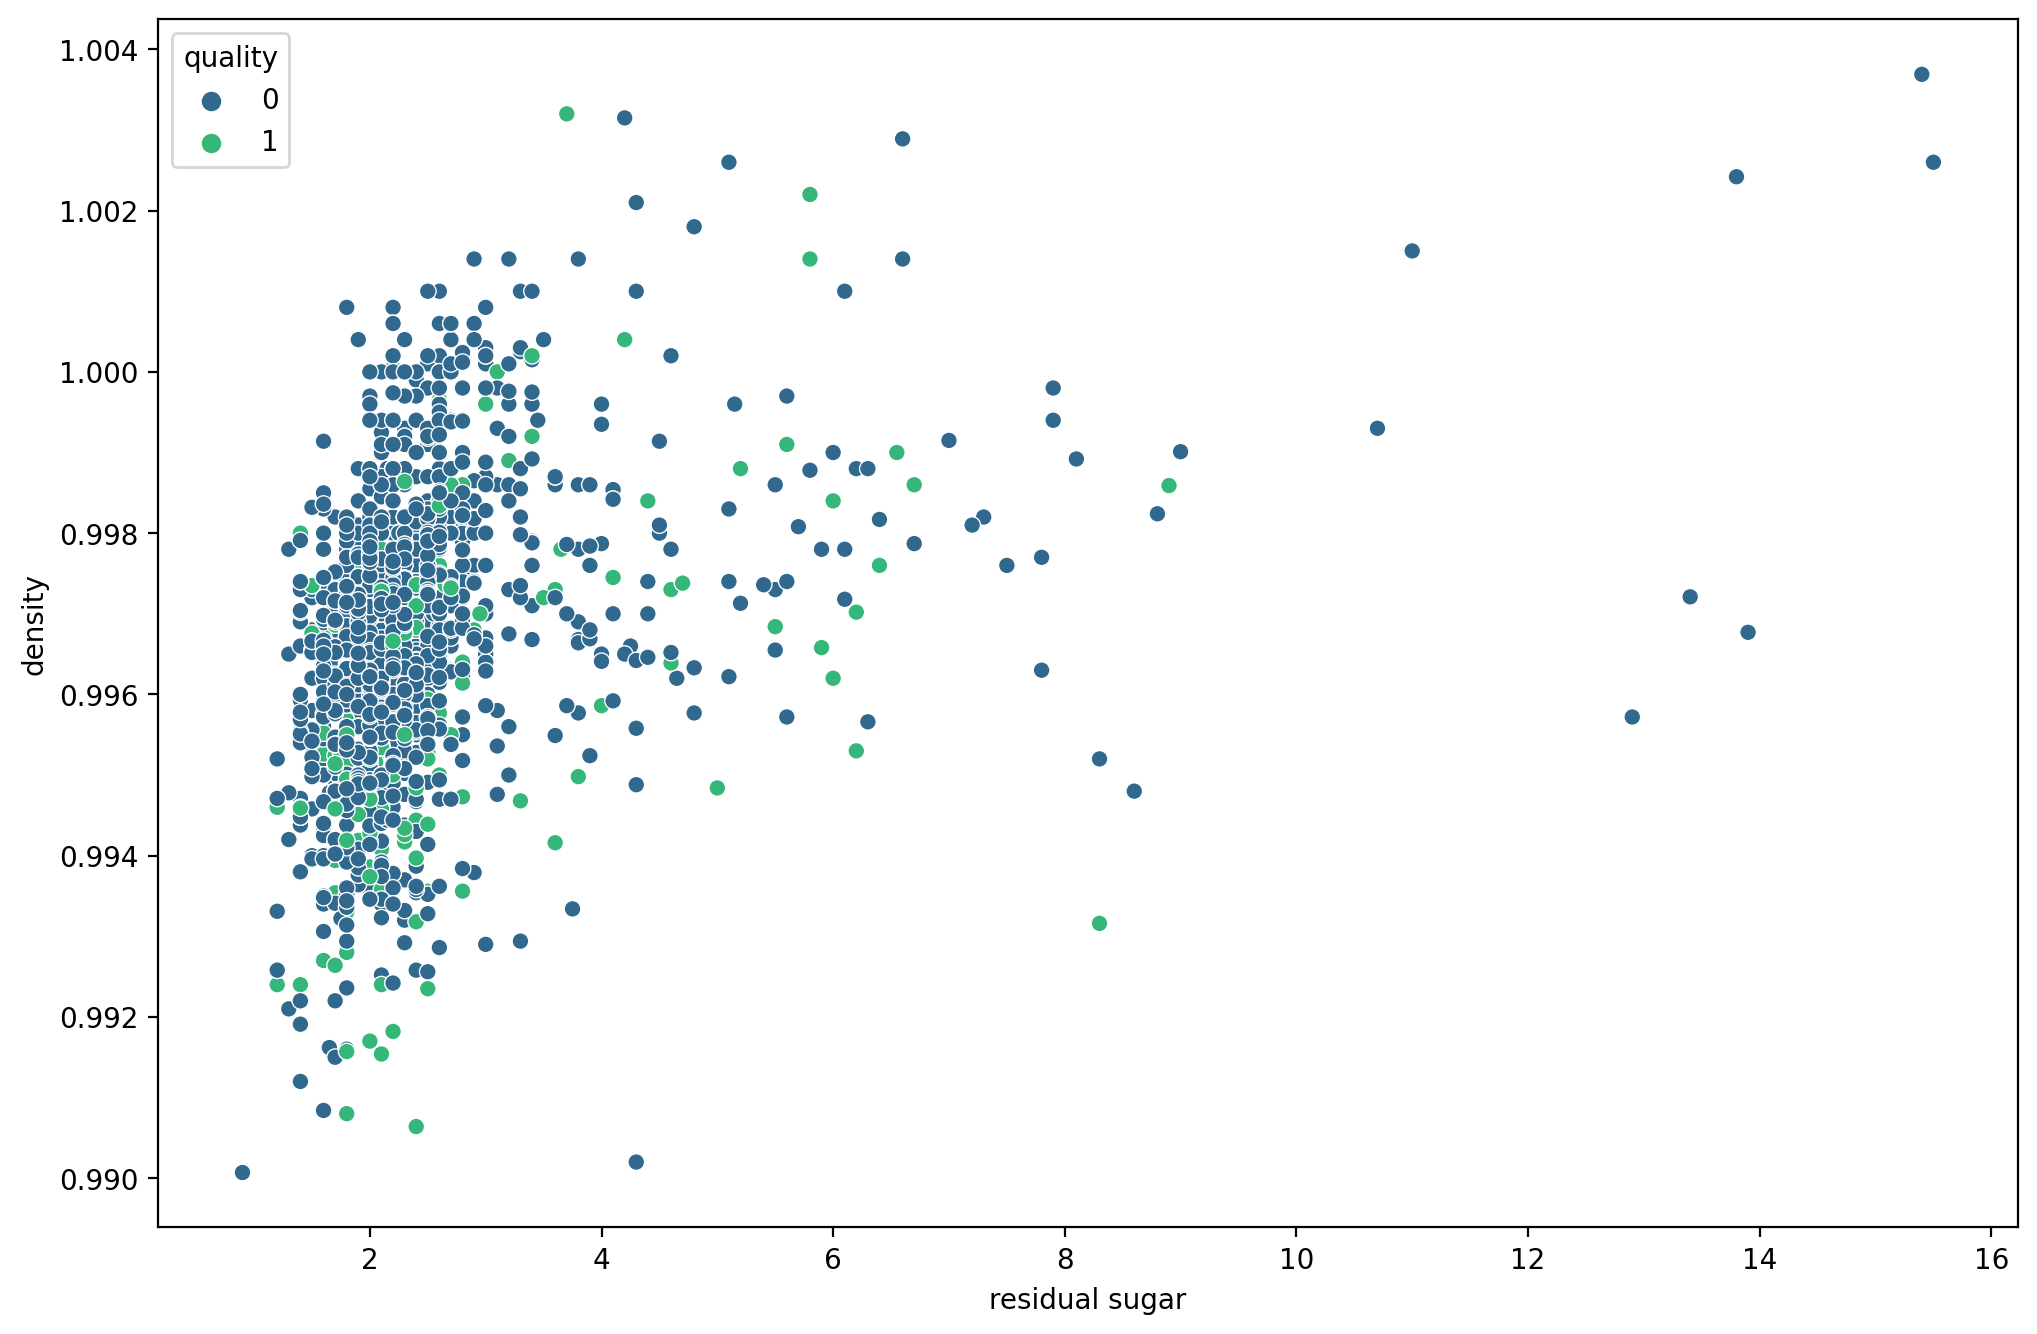

In [ ]:
 sns.scatterplot(x='residual sugar', y='density', data=df)
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='residual sugar',y='density', data=df,hue='quality', palette='viridis')

Here we find medium to low correlation

<AxesSubplot:title={'center':'Correlation of Features'}>

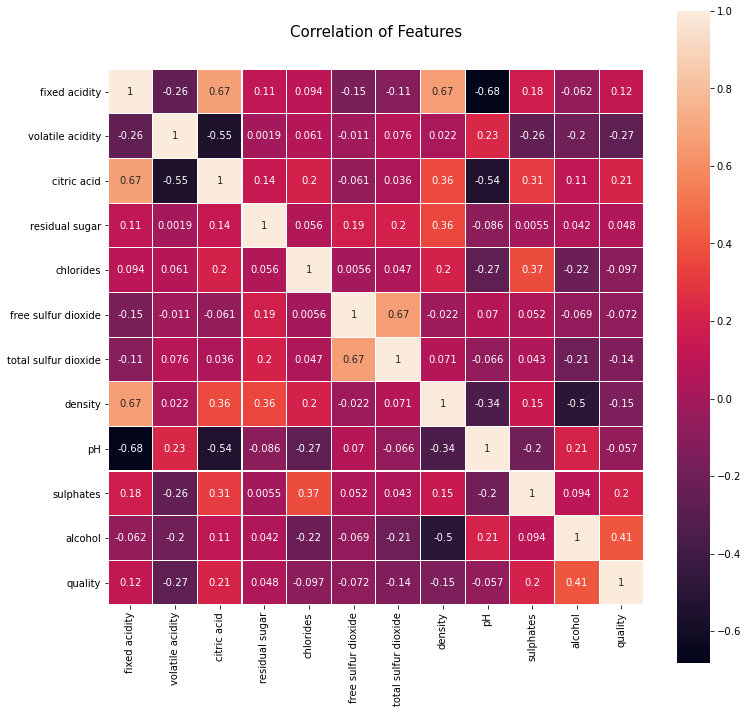

In [ ]:
corr = df.corr()
#Let's look at the correlation among the variables using Correlation chart
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,
 linecolor='white', annot=True)

Data Transformation We want to transfer the score(num) to low-medium-high quality

level(categorical) by:

3,4 -> low

5,6 -> medium

7,8,9 -> high

In [ ]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")


In [ ]:
[(i, category.count(i)) for i in set(category)]

[('Low', 1599)]

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']


In [ ]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       290
           1       0.68      0.50      0.58        30

    accuracy                           0.93       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.92      0.93      0.93       320



Random forest gives the accuracy of 87%

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[283   7]
 [ 15  15]]


Stochastic Gradient Decent Classifier

In [ ]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       290
           1       0.43      0.50      0.46        30

    accuracy                           0.89       320
   macro avg       0.69      0.72      0.70       320
weighted avg       0.90      0.89      0.89       320



82% accuracy using stochastic gradient descent classifier

In [ ]:
print(confusion_matrix(y_test, pred_sgd))

[[270  20]
 [ 15  15]]


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       290
           1       0.67      0.33      0.44        30

    accuracy                           0.92       320
   macro avg       0.80      0.66      0.70       320
weighted avg       0.91      0.92      0.91       320



Support vector classifier gets 86%

In [ ]:
# @hidden_cell
# relabel back : 0 means good, 1 for low, 2 for medium for better visualization
y_test_re = list(y_test)
for i in range(len(y_test_re)):
    if y_test_re[i] == 0:
        y_test_re[i] = "good"
    if y_test_re[i] == 1:
        y_test_re[i] = "low"
    if y_test_re[i] == 2:
        y_test_re[i] = "medium"
pred_sgd_re = list(pred_sgd)
for i in range(len(pred_sgd_re)):
    if pred_sgd_re[i] == 0:
        pred_sgd_re[i] = "good"
    if pred_sgd_re[i] == 1:
        pred_sgd_re[i] = "low"
    if pred_sgd_re[i] == 2:
        pred_sgd_re[i] = "medium"
y_actu = pd.Series(y_test_re, name='Actual')
y_pred = pd.Series(pred_sgd_re, name='Predicted')
svm_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
svm_confusion

Predicted,good,low
Actual,,
good,270,20
low,15,15


Grid Search CV

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 1.2, 'kernel': 'rbf'}

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       290
           1       0.76      0.53      0.63        30

    accuracy                           0.94       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.94      0.94      0.94       320



SVC improves from 86% to 90% using Grid Search CV

In [ ]:
grid_svc.best_score_

0.899138779527559

In [ ]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Cross Validation Score for random forest and SGD

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9022760826771654

Random forest accuracy increases from 87% to 91 % using cross validation score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       290
           1       0.41      0.37      0.39        30

    accuracy                           0.89       320
   macro avg       0.67      0.66      0.66       320
weighted avg       0.89      0.89      0.89       320



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       290
           1       0.46      0.40      0.43        30

    accuracy                           0.90       320
   macro avg       0.70      0.68      0.69       320
weighted avg       0.89      0.90      0.90       320



In [ ]:
# Filtering df for only good quality
df_temp = df[df['quality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


In [ ]:
def showQuality():
    new = np.array([[float(e1.get()),float(e2.get()),float(e3.get()),float(e4.get()),float(e5.get()),float(e6.get()),float(e7.get()),float(e8.get()),float(e9.get()),float(e10.get()),float(e11.get())]])
    Ans = RF_clf.predict(new)
    fin=str(Ans)[1:-1]#IT WILL remove[ ]
    quality.insert(0, fin)

In [ ]:
#Train and evaluate the Random Forest Classifier with Cross Validation
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=0)


# Compute k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')

#Perform predictions
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

In [ ]:
master = tk.Tk()

In [ ]:
tk.Label(master, text="Fixed Acidity", anchor="nw", width=15).grid(row=0)
tk.Label(master, text="Volatile Acidity", anchor="nw", width=15).grid(row=1)
tk.Label(master, text="Citric Acid", anchor="nw", width=15).grid(row=2)
tk.Label(master, text="Residual Sugar", anchor="nw", width=15).grid(row=3)
tk.Label(master, text="Chlorides", anchor="nw", width=15).grid(row=4)
tk.Label(master, text="Sulfur Dioxide", anchor="nw", width=15).grid(row=5)
tk.Label(master, text="Total Sulfur Dioxide", anchor="nw", width=15).grid(row=6)
tk.Label(master, text="Density", anchor="nw", width=15).grid(row=7)
tk.Label(master, text="pH", anchor="nw", width=15).grid(row=8)
tk.Label(master, text="Sulphates", anchor="nw", width=15).grid(row=9)
tk.Label(master, text="Alcohol", anchor="nw", width=15).grid(row=10)
tk.Label(master, text = "Quality", anchor="nw", width=15).grid(row=13)

In [ ]:
e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master)
e6 = tk.Entry(master)
e7 = tk.Entry(master)
e8 = tk.Entry(master)
e9 = tk.Entry(master)
e10 = tk.Entry(master)
e11 = tk.Entry(master)
quality = tk.Entry(master)

In [ ]:
e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)
e8.grid(row=7, column=1)
e9.grid(row=8, column=1)
e10.grid(row=9, column=1)
e11.grid(row=10, column=1)
quality.grid(row=13, column=1)

In [ ]:
tk.Button(master, text='Quit', command=master.destroy,width=15).grid(row=11, column=0, pady=4)
tk.Button(master, text='Find Quality', command=showQuality,width=17).grid(row=11, column=1, pady=4)
tk.Button(master, text='Project By',width=15).grid(row=14, column=0, pady=4)
tk.Button(master, text='Preeti Sharma',width=17).grid(row=14, column=1, pady=4)

In [ ]:
master.mainloop()